In [ ]:
!pip install rasterio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 72.4 MB/s eta 0:00:00


In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)

In [ ]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import rasterio as rio
from rasterio.plot import reshape_as_image
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Leitura dos arquivos
src1 = rio.open('/content/L71221071_07120010720_DN.tif')
src2 = rio.open('roi.tif')

img = reshape_as_image(src1.read())
roi = src2.read(1)

In [ ]:
# Definindo função para o KNN
def KNN(img, roi, k):
  X = img[roi > 0]
  y = roi[roi > 0]

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X, y)
  pred = knn.predict(X)
  img2d= img.reshape(img.shape[0] * img.shape[1], img.shape[2])
  pred2d = knn.predict(img2d)
  pred_final = pred2d.reshape(img[:, :, 0].shape)
  return pred_final

In [ ]:
# Rodando modelo
knn = KNN(img, roi, 100)

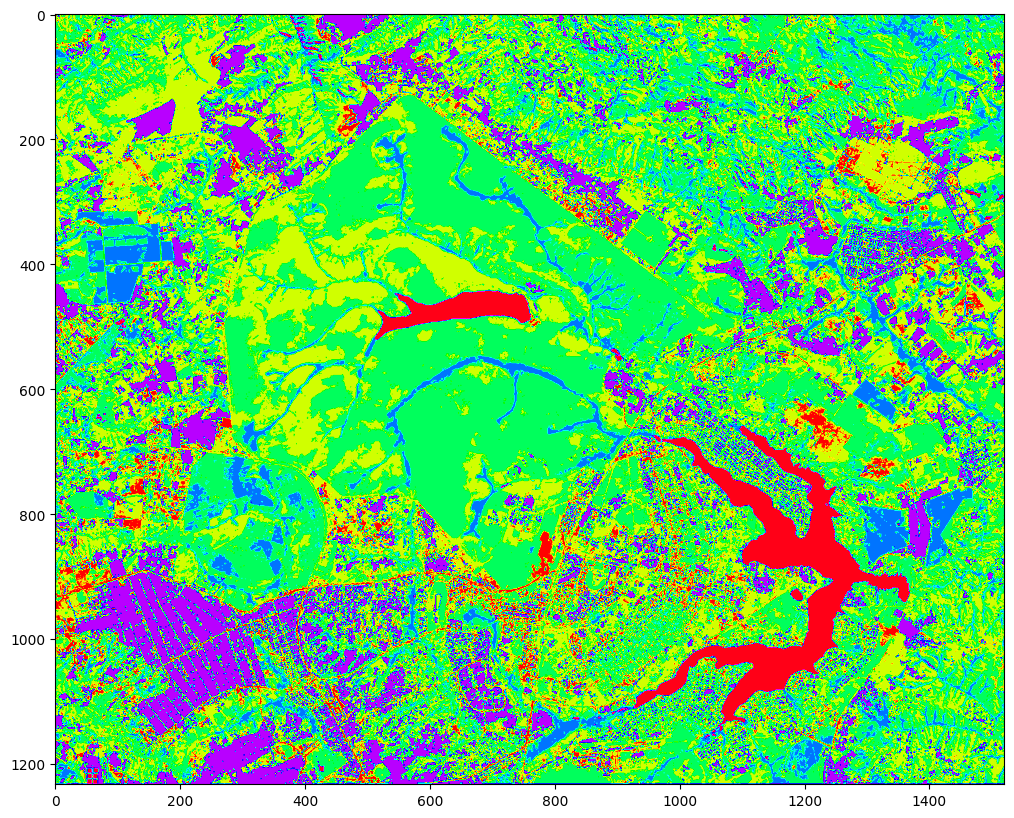

In [ ]:
# Visualizando resultado
plt.imshow(knn, cmap='hsv_r')